# Final project - 203200068 - flash drought
## In this jupyter notebook we have raw analyzation and graphs using data from different sources

In [1]:
# First we need to download all relvant packages for this project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from calendar import month_abbr
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
import urllib.request
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from functools import reduce
import re
import urllib.request

import matplotlib.dates as mdates
from ipywidgets import *
import matplotlib.patches as mpatches

# these will be useful when printing superscripts: m^2, m^3
squared = "\u00b2"
cubed = "\u00b3"

## First part - precipitation

In [2]:
# We will start on with yearly precipitation and analyze them

# a function that download monthly data
def download_data(station_name, station_code):
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
    urllib.request.urlretrieve(url_monthly + station_code + '.csv',
                               station_name + '_monthly.csv')

In [3]:
#1 downloading relevant data using function above
#2 reading the data

download_data('S', 'USC00243176')
# FROM NOW ON MONTHLY DATA OF Wolf point WILL BE CALLED S = short of precipitation
df_S = pd.read_csv('S_monthly.csv', sep=",")
# make 'DATE' the dataframe index
df_S['DATE'] = pd.to_datetime(df_S['DATE'])
df_S = df_S.set_index('DATE')

In [4]:
# choose only the precipitation column for Wolf point
df_S_month = df_S['PRCP']

# calculate monthly mean
monthly_mean = np.array([])  # empty array
month_numbers = np.arange(1,13)
month_names = [month_abbr[i] for i in month_numbers]

for m in month_numbers:      # cycle over months (1, 2, 3, etc)
    this_month_all_indices = (df_S_month.index.month == m)       # indices in df_month belonging to month m
    this_month_mean = df_S_month[this_month_all_indices].mean()  # this is the monthly mean
    monthly_mean = np.append(monthly_mean, this_month_mean)    # append

df_SWOLF = pd.DataFrame({'monthly rainfall (mm)':monthly_mean,
                             'month names':month_names,
                             'month number':month_numbers,
#                              '2017' : df_2017
                            })

In [5]:
# annual frequency, anchored 1 Januar - Wolf point

df_year_all_S = df_S['PRCP'].resample('AS').sum().to_frame()
# rename 'PRCP' column to 'rain (mm)'
df_year_all_S.columns = ['rain (mm)']
# exclude both 1st and last rows
df_year_S = df_year_all_S.iloc[1:-1]

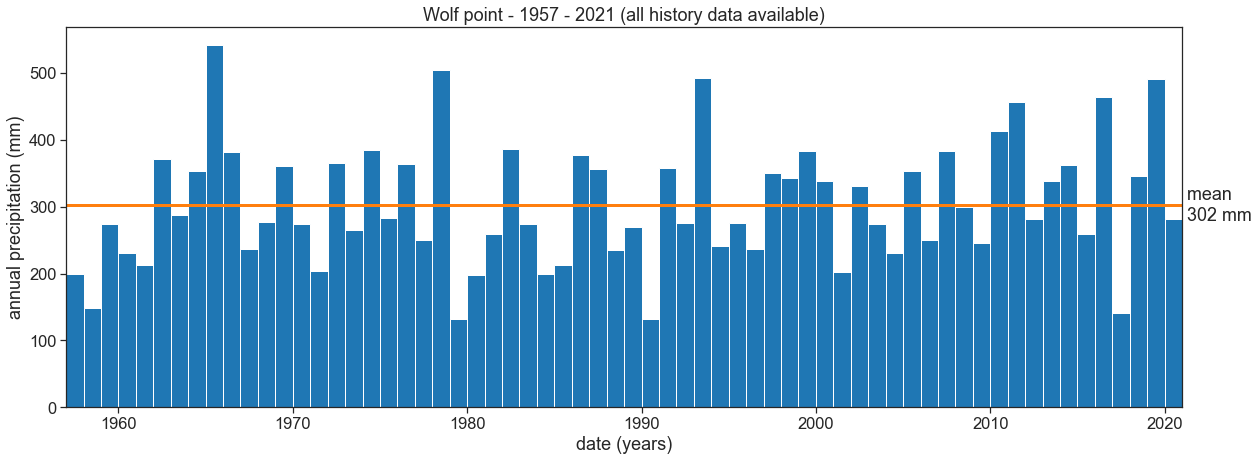

In [6]:
# annual frequency 1957 - 2021
fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
plt.subplots_adjust(wspace=0.4)

# plot YEARLY precipitation - Wolf point
ax1.bar(df_year_S.index, df_year_S['rain (mm)'],
       width=365, align='edge', color="tab:blue")
# plot mean
rain_mean = df_year_S['rain (mm)'].mean()
ax1.plot(df_year_S*0 + rain_mean, linewidth=3, color="tab:orange")
# adjust labels, ticks, title, etc
ax1.set_title("Wolf point - 1957 - 2021 (all history data available)")
ax1.set_xlabel("date (years)")
ax1.set_ylabel("annual precipitation (mm)")
ax1.set_xlim([df_year_S.index[0], df_year_S.index[-1]])
# write mean on the right
ax1.text(df_year_S.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");

plt.savefig('Wolf point - 1957 - 2022 (all history data available).png')

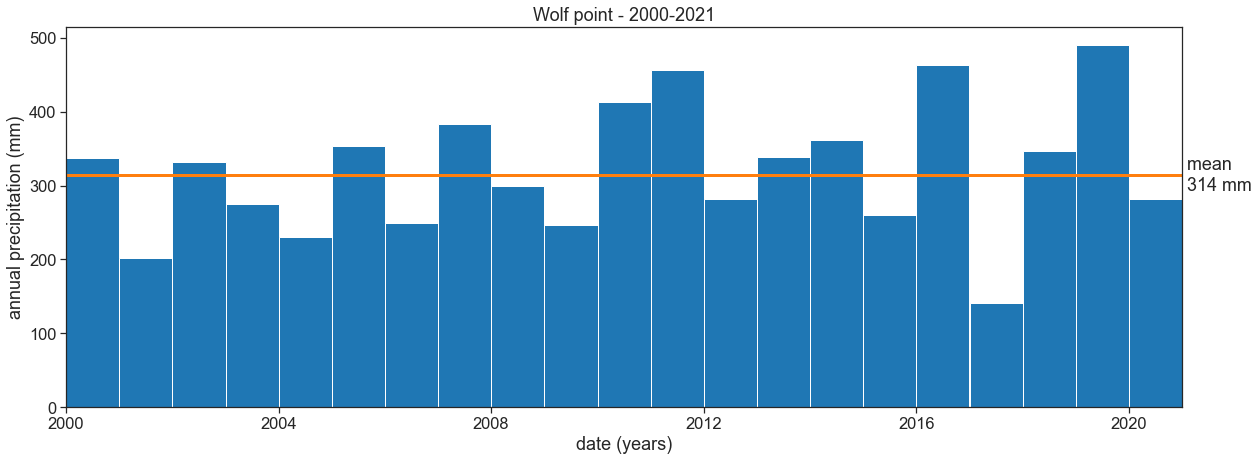

In [7]:
# Zooming in on 2000-2021 precipitation

df_year_Specific = df_year_all_S.iloc[-23:-1]

fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
plt.subplots_adjust(wspace=0.4)

# plot YEARLY precipitation - Wolf point
ax1.bar(df_year_Specific.index, df_year_Specific['rain (mm)'],
       width=365, align='edge', color="tab:blue")
# plot mean
rain_mean = df_year_Specific['rain (mm)'].mean()
ax1.plot(df_year_S*0 + rain_mean, linewidth=3, color="tab:orange")
# adjust labels, ticks, title, etc
ax1.set_title("Wolf point - 2000-2021")
ax1.set_xlabel("date (years)")
ax1.set_ylabel("annual precipitation (mm)")
ax1.set_xlim([df_year_Specific.index[0], df_year_Specific.index[-1]])
# write mean on the right
ax1.text(df_year_Specific.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");

plt.savefig('Wolf point - 2000 - 2021 .png')

Text(500, 20, 'CV =0.31')

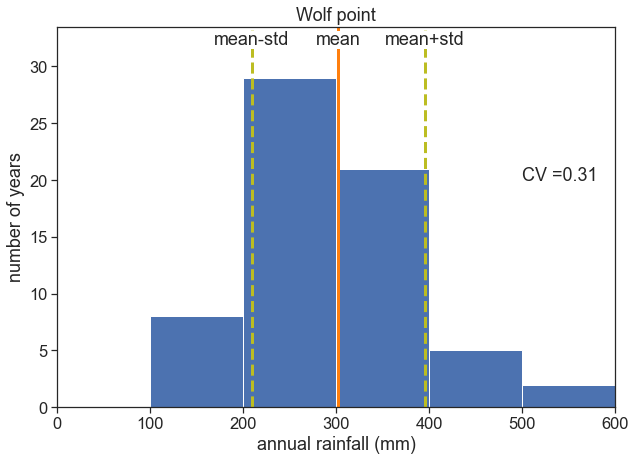

In [8]:
# number of years with a certain annual precipitation with mean annual and std

fig, (ax1) = plt.subplots(1,1,figsize=(10,7))
plt.subplots_adjust(wspace=0.3)

# Wolf point
# calculate mean and standard deviation
rain_mean = df_year_S['rain (mm)'].mean()
rain_std = df_year_S['rain (mm)'].std()
# plot histogram
b = np.arange(0, 1100, 100)  # bins from 0 to 55, width = 5
ax1.hist(df_year_S, bins=b)
# plot vertical lines with mean, std, etc
ylim = np.array(ax1.get_ylim())
ylim[1] = ylim[1]*1.1
ax1.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax1.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:olive")
ax1.set_ylim(ylim)
ax1.set_xlim(0,600)

# write mean, std, etc
ax1.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax1.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
ax1.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="center",
        verticalalignment="top",
        bbox=dict(facecolor='white', edgecolor='none', pad=0.0))
# adjust labels, ticks, title, limits, etc
ax1.set_title("Wolf point")
ax1.set_xlabel("annual rainfall (mm)")
ax1.set_ylabel("number of years")
# saving data of cv using relevant variables 
CV_Wolf = rain_std / rain_mean
CV_Wolf= (f"{CV_Wolf:.2f}")
ax1.text(500, 20 , f"CV ="+ CV_Wolf )


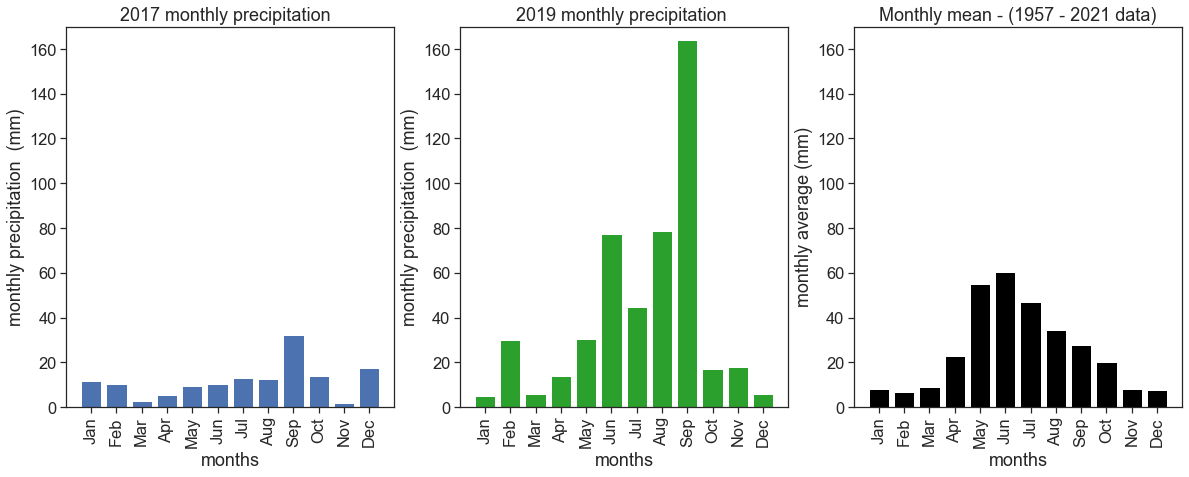

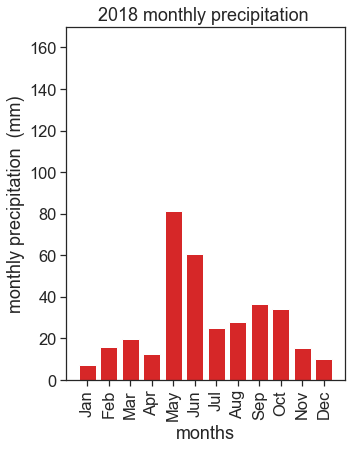

In [9]:
#Wolf point - 2017 - 2019 and monthly mean rainfall
fig2, (ax2 ,ax4,ax1) = plt.subplots(1, 3, figsize=(20,7))

#Wolf point - 2017 monthly rainfall
df_2017 = df_S['PRCP']['2017-01-01':'2017-12-01']
df_2017 = pd.DataFrame({
                             '2017' : df_2017})
ax2.bar(df_SWOLF['month number'], df_2017['2017'])
ax2.set(xlabel="months",
       ylabel="monthly precipitation  (mm)",
       title="2017 monthly precipitation  ",
       xticks=df_SWOLF['month number'],
       xticklabels=df_SWOLF['month names']);
ax2.set_ylim(0,170)                        # limits of y axis
for label in ax2.get_xticklabels():
  label.set_rotation(90)
  label.set_ha('center')


#Wolf point - average monthly rainfall
ax1.bar(df_SWOLF['month number'], df_SWOLF['monthly rainfall (mm)'], color="black")
ax1.set(xlabel="months",
       ylabel="monthly average (mm)",
       title="Monthly mean - (1957 - 2021 data)",
       xticks=df_SWOLF['month number'],
       xticklabels=df_SWOLF['month names']);
ax1.set_ylim(0,170)                        # limits of y axis
for label in ax1.get_xticklabels():
  label.set_rotation(90)
  label.set_ha('center')

                     # limits of y axis

#Wolf point - 2019 monthly rainfall
df_2019 = df_S['PRCP']['2019-01-01':'2019-12-01']

df_2019 = pd.DataFrame({
                             '2019' : df_2019})
ax4.bar(df_SWOLF['month number'], df_2019['2019'], color="tab:green")
ax4.set(xlabel="months",
       ylabel="monthly precipitation  (mm)",
       title="2019 monthly precipitation ",
       xticks=df_SWOLF['month number'],
       xticklabels=df_SWOLF['month names']);
ax4.set_ylim(0,170)                        # limits of y axis
for label in ax4.get_xticklabels():
  label.set_rotation(90)
  label.set_ha('center')

plt.savefig('comparison of monthly precipitation')

fig, (ax3) = plt.subplots(1,1,figsize=(5,6.5))
plt.subplots_adjust(wspace=0.3)

df_2018 = df_S['PRCP']['2018-01-01':'2018-12-01']
df_2018 = pd.DataFrame({
                             '2018' : df_2018})
ax3.bar(df_SWOLF['month number'], df_2018['2018'] ,color="tab:red")
ax3.set(xlabel="months",
       ylabel="monthly precipitation  (mm)",
       title="2018 monthly precipitation ",
       xticks=df_SWOLF['month number'],
       xticklabels=df_SWOLF['month names']);
ax3.set_ylim(0,170)   
for label in ax3.get_xticklabels():
  label.set_rotation(90)
  label.set_ha('center')



In [10]:
# walsh index function - seasonality index
def walsh_index(df):
    m = df["monthly rainfall (mm)"]
    R = df["monthly rainfall (mm)"].sum()
    SI = np.sum(np.abs(m - R/12)) / R
    return SI
SI_Wolf = str(round(walsh_index(df_SWOLF) , 2))

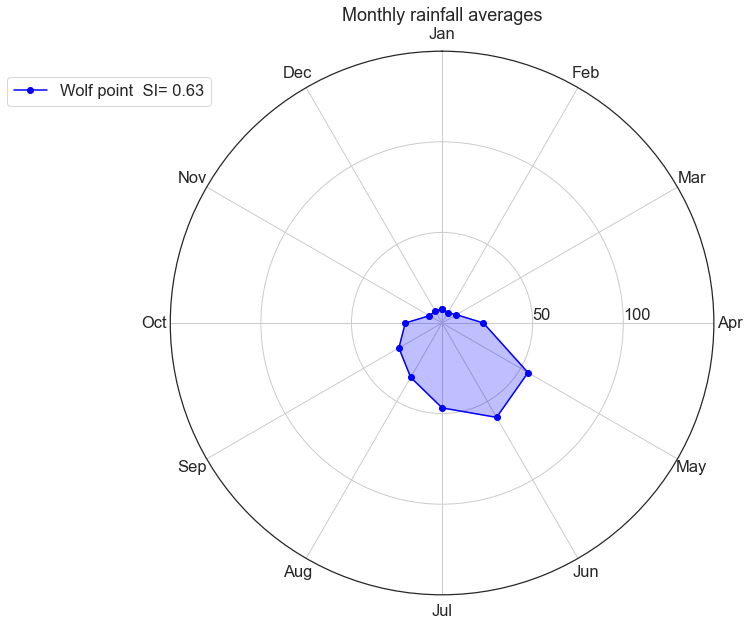

In [11]:
# radar chart - monthly rainfall average for all years 1975 - 2021
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, polar=True)     # make polar plot
ax.set_theta_zero_location("N")           # January on top ("N"orth)
ax.set_theta_direction(-1)                # clockwise direction
ax.set_rlabel_position(90)                # radial labels on the right
ax.set_rticks([50,100])                   # two radial ticks is enough
ax.set_rlim(0,150)                        # limits of r axis
angles=np.linspace(0, 2*np.pi, 12, endpoint=False)       # divide circle into 12 slices
angles=np.append(angles, angles[0])                      # close loop, otherwise lines will be open
ax.set_thetagrids(angles[:-1] * 180/np.pi, month_names)  # relabel angles with month names

# plot Wolf point data
stats_S = np.array(df_SWOLF['monthly rainfall (mm)'])        # get Wolf point data
stats_S = np.append(stats_S, stats_S[0])            # close loop
ax.plot(angles, stats_S, "o-", color='blue', label="Wolf point  SI= "+ SI_Wolf)  # plot line
ax.fill(angles, stats_S, alpha=0.25, color='blue')            # fill



ax.set_title("Monthly rainfall averages")
ax.legend(loc=(-0.3,0.9))  # legend at x=-0.2 so it doesn't overlap with graph

plt.savefig('monthly rainfall radar chart')

In [12]:
# We will now move on to daily data finding extreme events and return period
def download_data(station_name, station_code):
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                               station_name + '_daily.csv')

In [13]:
download_data('SS', 'USC00243176')
# # FROM NOW ON DAILY DATA OF Wolf point WILL BE CALLED SS = Wolf point
dfSS = pd.read_csv('SS_daily.csv', sep=",")
# make 'DATE' the dataframe index
dfSS['DATE'] = pd.to_datetime(dfSS['DATE'])
dfSS = dfSS.set_index('DATE')
#daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
dfSS['PRCP'] = dfSS['PRCP'] / 10

D:\admin\BLANK\Configuration\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,21,23,25,27,31,33,35,37,41,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Text(0.5, 1.0, 'Wolf point')

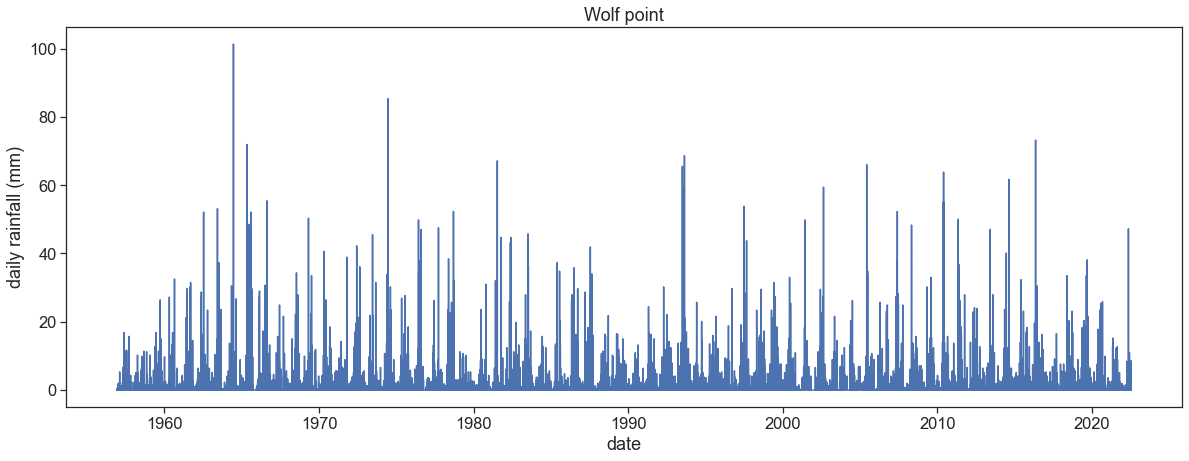

In [14]:
# daily precipitation graph for all data - 1957 - 2021
fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

ax1.plot(dfSS['PRCP'],)
ax1.set_xlabel("date")
ax1.set_ylabel("daily rainfall (mm)")
ax1.set_title("Wolf point")

In [15]:
#excluding unnecessary dates according graph above
last_date_S = '2022-07-16'
first_date_S = '1956-12-02'
dfSSS = dfSS[((dfSS.index < last_date_S) & (dfSS.index > first_date_S))]

In [16]:
#finding max daily percipitation of each year
max_annual_S = (dfSSS['PRCP'].resample('A')
                        .max()
                        .to_frame())
max = (df_S['PRCP'].resample('A')
                        .max()
                        .to_frame())

Text(0.5, 1.0, 'Wolf point')

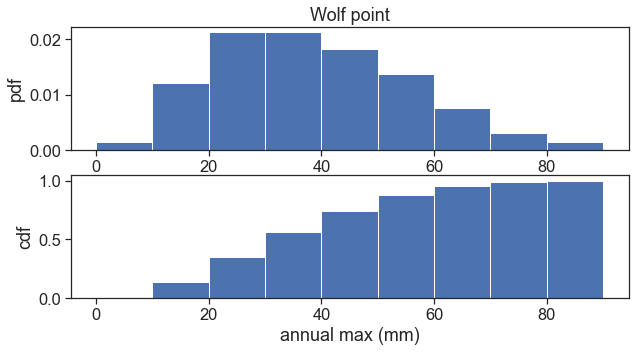

In [17]:
#creating two figures of pdf and cdf 
fig, ((ax1), (ax3)) = plt.subplots(2, 1, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)


S=max_annual_S['PRCP'].values
ax1.hist(S, bins=np.arange(0,100,10), density=True)
ax3.hist(S, bins=np.arange(0,100,10), cumulative=1, density=True)
ax1.set(ylabel="pdf")
ax3.set(xlabel="annual max (mm)",
        ylabel="cdf",);

ax1.set_title("Wolf point")

In [18]:
# resample daily data into yearly data (maximum yearly value)
max_annual_S = dfSS['PRCP'].resample('A').max().to_frame()
# sort yearly max from lowest to highest
max_annual_S = max_annual_S.sort_values(by=['PRCP'], ascending=True)
max_annual_S['rank'] = np.arange(0, len(max_annual_S + 1))

nS = len(max_annual_S['rank'])
mS = max_annual_S['rank']
PmS = mS / (nS+1)
TrS = 1 / (1 - PmS)

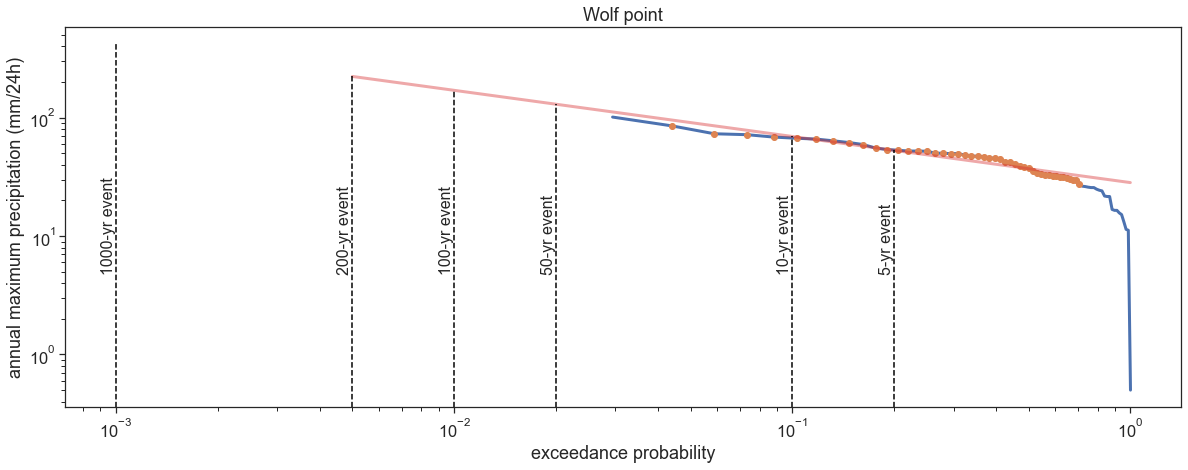

In [19]:
# return period graph for daily events of rain
fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

def equation(p):
    return np.exp(slope*np.log(p) + intercept)

depthS = max_annual_S['PRCP'].values
exc_probS = (1-PmS).values

ax1.plot(exc_probS, depthS, lw=3, label="Weibull plotting position")
ax1.set(ylabel="annual maximum precipitation (mm/24h)",
       xlabel="exceedance probability")
ax1.set_xscale("log")
ax1.set_yscale("log")

excludeS = 20
depth_tofitS = depthS[excludeS:-1]
exc_prob_tofitS = exc_probS[excludeS:-1]
ax1.plot(exc_prob_tofitS, depth_tofitS, 'o')

exc_prob_tofit_logS = np.log(exc_prob_tofitS)
depth_tofit_logS = np.log(depth_tofitS)
slope, intercept = np.polyfit(exc_prob_tofit_logS, depth_tofit_logS, 1)

probS = [0.005,1-1e-3]
ax1.plot(probS, equation(probS), lw=3, color="tab:red", alpha=0.4)
ax1.set_title("Wolf point")

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equation(1/y)], color="black", ls="--")
    ax1.text(1/y, 5, f"{y}-yr event", rotation=90, ha="right", fontsize=16)


In [20]:
# Since my project is about droughts it will be better to look on drought years events rather then rainy days event

# resample yearly precipitation from highest to lowest
df_year_S = df_year_S.sort_values(by=['rain (mm)'], ascending=False)
df_year_S['rank'] = np.arange(0, len(df_year_S + 1))

nS1 = len(df_year_S['rank'])
mS1 = df_year_S['rank']
PmS1 = mS1 / (nS1+1)
TrS1 = 1 / (1 - PmS1)

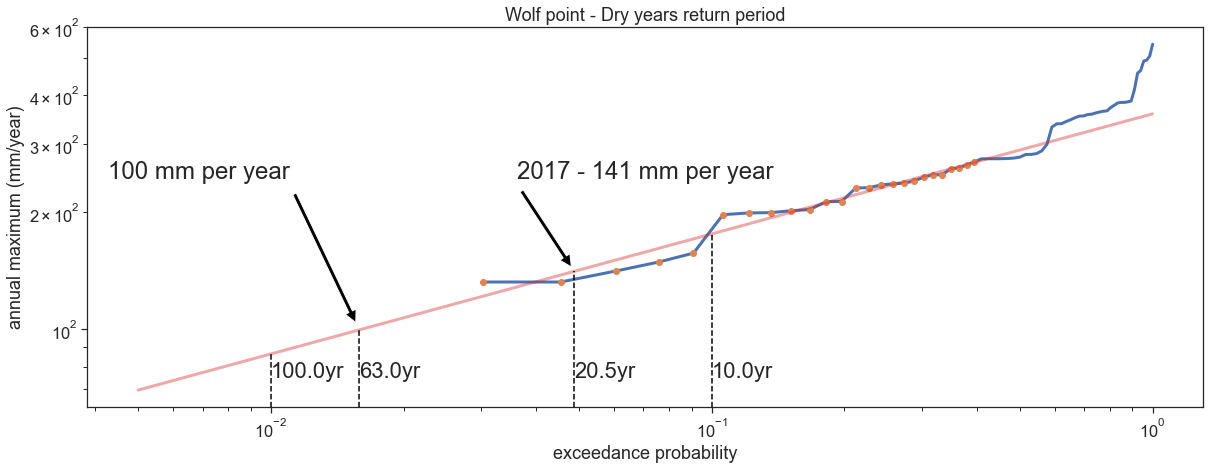

In [21]:
#creating a graph looking at the probability of a year with equal or lower precipitation

fig, (ax2) = plt.subplots(1,1,figsize=(20,7))
plt.subplots_adjust(wspace=0.3)

def equation(p):
    return np.exp(slope*np.log(p) + intercept)


depthS1 = df_year_S['rain (mm)'].values
exc_probS1 = (1-PmS1).values

ax2.plot(exc_probS1, depthS1, lw=3, label="Weibull plotting position")
ax2.set(ylabel="annual maximum (mm/year)",
       xlabel="exceedance probability")
ax2.set_xscale("log")
ax2.set_yscale("log")

excludeS1 = 40
depth_tofitS1 = depthS1[excludeS1:]
exc_prob_tofitS1 = exc_probS1[excludeS1:]
ax2.plot(exc_prob_tofitS1, depth_tofitS1, 'o')

exc_prob_tofit_logS1 = np.log(exc_prob_tofitS1)
depth_tofit_logS1 = np.log(depth_tofitS1)
slope, intercept = np.polyfit(exc_prob_tofit_logS1, depth_tofit_logS1, 1)

probS1 = [0.005,1-1e-3]
ax2.plot(probS1, equation(probS1), lw=3, color="tab:red", alpha=0.4)
ax2.set_title("Wolf point - Dry years return period")

ax2.annotate(f"2017 - {equation(1/20.5):.0f} mm per year",
            xy=(1/20.5, equation(1/20.5)), xycoords='data',
             xytext=(0.5, 0.6), textcoords='axes fraction',
             fontsize=24, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

ax2.annotate(f"{equation(1/63):.0f} mm per year",
            xy=(1/63, equation(1/63)), xycoords='data',
             xytext=(0.1, 0.6), textcoords='axes fraction',
             fontsize=24, horizontalalignment="center",
             arrowprops=dict(facecolor='black', shrink=0.05))


one_in_x_years = np.array([10 , 20.5 , 63 , 100 , ])
for y in one_in_x_years:
    ax2.plot([1/y]*2, [0, equation(1/y)], color="black", ls="--")
    ax2.text(1/y, 75,  f"{y}" 'yr', rotation=0, ha="left", fontsize=22)

plt.savefig('Return period for dry years')

In [22]:
# Looking at the rainiest and driest years in the last 65 years
df_year_S

,rain (mm),rank
DATE,,
1965-01-01,541.8,0
1978-01-01,504.9,1
1993-01-01,492.9,2
2019-01-01,490.2,3
2016-01-01,463.4,4
...,...,...
2021-01-01,156.9,60
1958-01-01,148.8,61
2017-01-01,141.1,62


## Second part - Et using Thorthwaite and penman's equations
### finding other meteoroligical parameters - Temperature, RH, VPD, wind speed and radiation

In [23]:
# downloading meteoroligical data's into array's for 2017-2019

data_2017 = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2017/CRNS0101-05-2017-MT_Wolf_Point_34_NE.txt"
data_2018 = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2018/CRNS0101-05-2018-MT_Wolf_Point_34_NE.txt"
data_2019 = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2019/CRNS0101-05-2019-MT_Wolf_Point_34_NE.txt"

## 2017

df_2017 = pd.read_csv(data_2017,
                 header=None,                      
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/headers.txt",               # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_2017.columns = headers.columns                                 # rename df columns with headers columns
# LST = local standard time
df_2017["LST_TIME"] = [f"{x:04d}" for x in df_2017["LST_TIME"]]     # time needs padding of zeros, then convert to string
df_2017['LST_DATE'] = df_2017['LST_DATE'].astype(str)               # convert date into string
df_2017['datetime'] = df_2017['LST_DATE'] + ' ' + df_2017['LST_TIME'] # combine date+time into datetime
df_2017['datetime'] = pd.to_datetime(df_2017['datetime'])           # interpret datetime
df_2017 = df_2017.set_index('datetime')                             # make datetime the index

## 2018
df_2018 = pd.read_csv(data_2018,
                 header=None,                     
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
                
df_2018.columns = headers.columns                                 # rename df columns with headers columns
df_2018["LST_TIME"] = [f"{x:04d}" for x in df_2018["LST_TIME"]]     # time needs padding of zeros, then convert to string
df_2018['LST_DATE'] = df_2018['LST_DATE'].astype(str)               # convert date into string
df_2018['datetime'] = df_2018['LST_DATE'] + ' ' + df_2018['LST_TIME'] # combine date+time into datetime
df_2018['datetime'] = pd.to_datetime(df_2018['datetime'])           # interpret datetime
df_2018 = df_2018.set_index('datetime')                             # make datetime the index

## 2019
df_2019 = pd.read_csv(data_2019,
                 header=None,                     
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
                
df_2019.columns = headers.columns                                 # rename df columns with headers columns
df_2019["LST_TIME"] = [f"{x:04d}" for x in df_2019["LST_TIME"]]     # time needs padding of zeros, then convert to string
df_2019['LST_DATE'] = df_2019['LST_DATE'].astype(str)               # convert date into string
df_2019['datetime'] = df_2019['LST_DATE'] + ' ' + df_2019['LST_TIME'] # combine date+time into datetime
df_2019['datetime'] = pd.to_datetime(df_2019['datetime'])           # interpret datetime
df_2019 = df_2019.set_index('datetime')                             # make datetime the index



In [24]:
#Starting to arrage the data frames resampeling temperature by month for Thorthwaite equation

# monthly data for 2017
df_2017T = (df_2017['AIR_TEMPERATURE'].resample('MS')  # MS assigns mean to first day in the month
                .mean()
                .to_frame() )
# we now add 14 days to the index, so that all monthly data is in the middle of the month
# df_2017T.index = df_2017T.index + pd.DateOffset(days=1)

# monthly data for 2018
df_2018T = (df_2018['AIR_TEMPERATURE'].resample('MS')  # MS assigns mean to first day in the month
                .mean()
                .to_frame() )
# df_2018T.index = df_2018T.index + pd.DateOffset(days=14)

# monthly data for 2019
df_2019T = (df_2019['AIR_TEMPERATURE'].resample('MS')  # MS assigns mean to first day in the month
                .mean()
                .to_frame() )
# df_2019T.index = df_2019T.index + pd.DateOffset(days=1)
# df_2018T['AIR_TEMPERATURE'][0] = df_2017T['AIR_TEMPERATURE'][-1]
# df_2018T['AIR_TEMPERATURE'][-1] = df_2019T['AIR_TEMPERATURE'][-0]
df_2017T = df_2017T.iloc[1: , :]
df_2018T = df_2018T.iloc[1: , :]
df_2019T = df_2019T.iloc[1: , :]


In [25]:
#preparing I and a for 2017-2019

#2017
# "I" 
I = np.sum( (df_2017T['AIR_TEMPERATURE']/5)**(1.514) )
# a
a = (+6.75e-7 * I**3 
     -7.71e-5 * I**2
     +1.792e-2 * I
     + 0.49239)
# The final Thornthwaite model for monthly potential ET (mm)
df_2017T['Ep'] = 16*((10*df_2017T['AIR_TEMPERATURE']/I)**a)
#turning nan to 0 
df_2017T['Ep'] = df_2017T['Ep'].fillna(0)

#2018
# I
I = np.sum( (df_2018T['AIR_TEMPERATURE']/5)**(1.514) )
# a
a = (+6.75e-7 * I**3 
     -7.71e-5 * I**2
     +1.792e-2 * I
     + 0.49239)
# The final Thornthwaite model for monthly potential ET (mm)
df_2018T['Ep'] = 16*((10*df_2018T['AIR_TEMPERATURE']/I)**a)
df_2018T['Ep'] = df_2018T['Ep'].fillna(0)

#2019
# I
I = np.sum( (df_2019T['AIR_TEMPERATURE']/5)**(1.514) )
# a
a = (+6.75e-7 * I**3 
     -7.71e-5 * I**2
     +1.792e-2 * I
     + 0.49239)
# The final Thornthwaite model for monthly potential ET (mm)
df_2019T['Ep'] = 16*((10*df_2019T['AIR_TEMPERATURE']/I)**a)
df_2019T['Ep'] = df_2019T['Ep'].fillna(0)

In [26]:
#Calculating thornthwaite graph for all years 1957 - 2021

df_S['Thornthwaite'] = 0.0
start = df_S.index.year.min()
end = df_S.index.year.max()
for year in np.arange(start, end+1):
    one_year = df_S.loc[f'{year:.0f}-01-01':f'{year:.0f}-12-01']
    I = np.sum( (one_year['TAVG']/5)**(1.514) )
    a = (+6.75e-7 * I**3 
         -7.71e-5 * I**2
         +1.792e-2 * I
         + 0.49239)
    one_year['Thornthwaite'] = 16*((10*one_year['TAVG']/I)**a)

# make new column, fill with nan
df_S['Thornthwaite'] = np.nan
# group data by months
yearly_groups = df_S.groupby(pd.Grouper(freq='A-JAN'))
# iterate over hydrological years, compute Thornthwaite's PET for each month
for group_name, year_chunk in yearly_groups:
    I = np.sum( (year_chunk['TAVG']/5)**(1.514) )
    a = (+6.75e-7 * I**3 
         -7.71e-5 * I**2
         +1.792e-2 * I
         + 0.49239)
    # the .at property lets you change the original dataframe 
    df_S.at[year_chunk.index, 'Thornthwaite'] = 16*((10*year_chunk['TAVG']/I)**a)

<ipython-input-26-15b563911d15>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_year['Thornthwaite'] = 16*((10*one_year['TAVG']/I)**a)


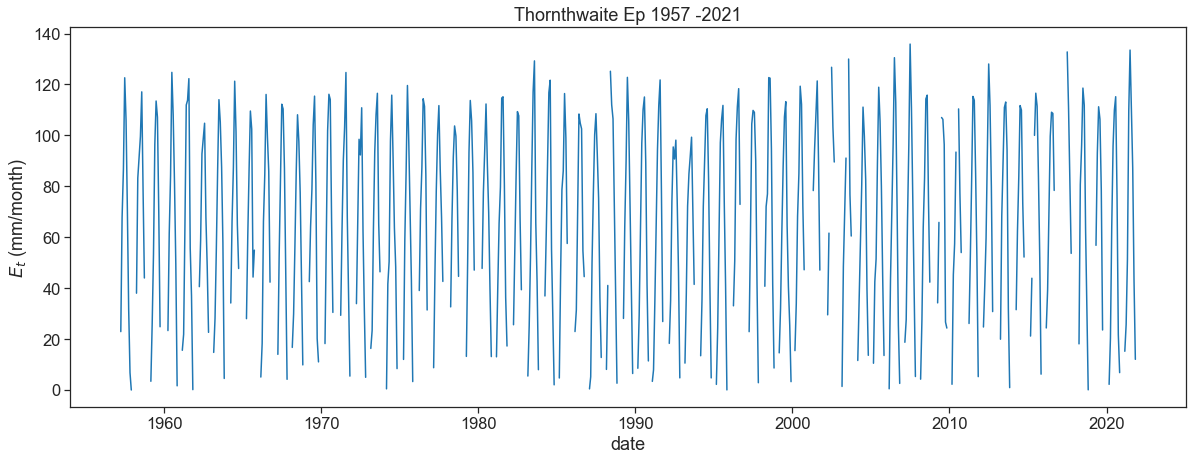

In [27]:
#thornthwaite graph for all years 1957 - 2021

fig, (ax1) = plt.subplots(1,1,figsize=(20,7))
ax1.plot(df_S['Thornthwaite'], color="tab:blue")
ax1.set(xlabel="date",
       ylabel=r"$E_t$ (mm/month)",
       title="Thornthwaite Ep 1957 -2021");

plt.savefig('Thornthwaite 1957-2021')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


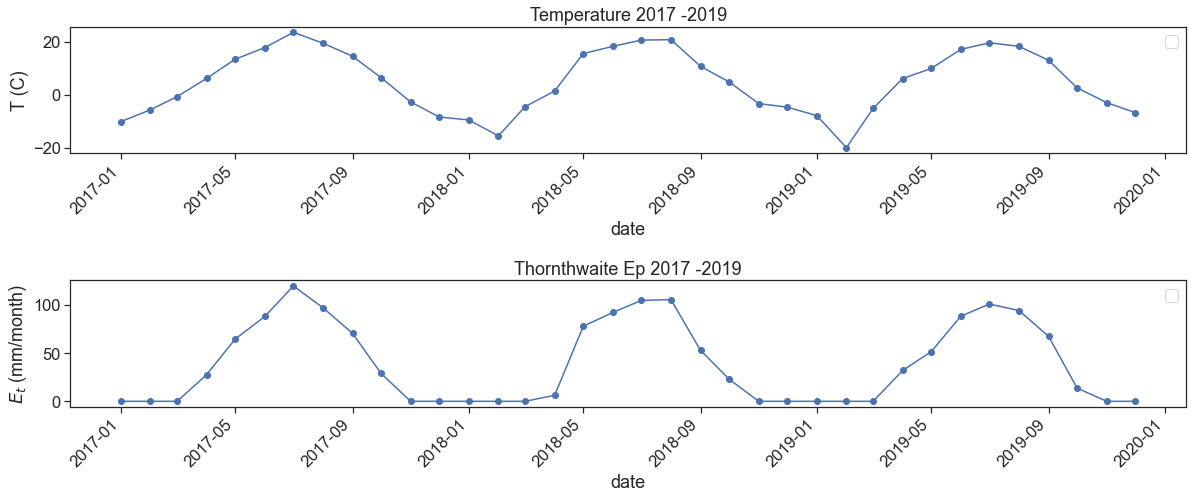

In [28]:
# Combining Thornthwaite results to have graph for all three years
combine_T =df_2017T['AIR_TEMPERATURE'].to_frame()
combine_T = combine_T.append(df_2018T['AIR_TEMPERATURE'].to_frame())
combine_T = combine_T.append(df_2019T['AIR_TEMPERATURE'].to_frame())

combine_Ep =df_2017T['Ep'].to_frame()
combine_Ep = combine_Ep.append(df_2018T['Ep'].to_frame())
combine_Ep = combine_Ep.append(df_2019T['Ep'].to_frame())
fig, ((ax1) ,(ax2)) = plt.subplots(2, 1, figsize=(20,7))

plt.subplots_adjust(hspace=1)
ax1.plot(combine_T['AIR_TEMPERATURE'], 'o-')
ax1.set(xlabel="date",
       ylabel="T (C)",
       title="Temperature 2017 -2019");
ax1.legend()
for label in ax1.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
    
ax2.plot(combine_Ep['Ep'], 'o-')
ax2.set(xlabel="date",
       ylabel=r"$E_t$ (mm/month)",
       title="Thornthwaite Ep 2017 -2019");
ax2.legend()
for label in ax2.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')

plt.savefig('Thornthwaite and temperature')

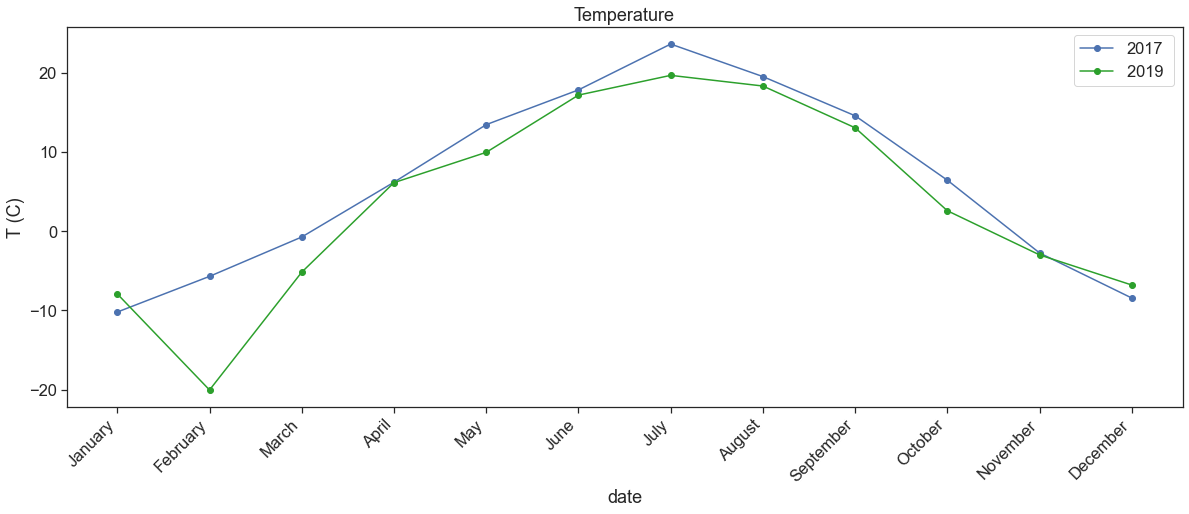

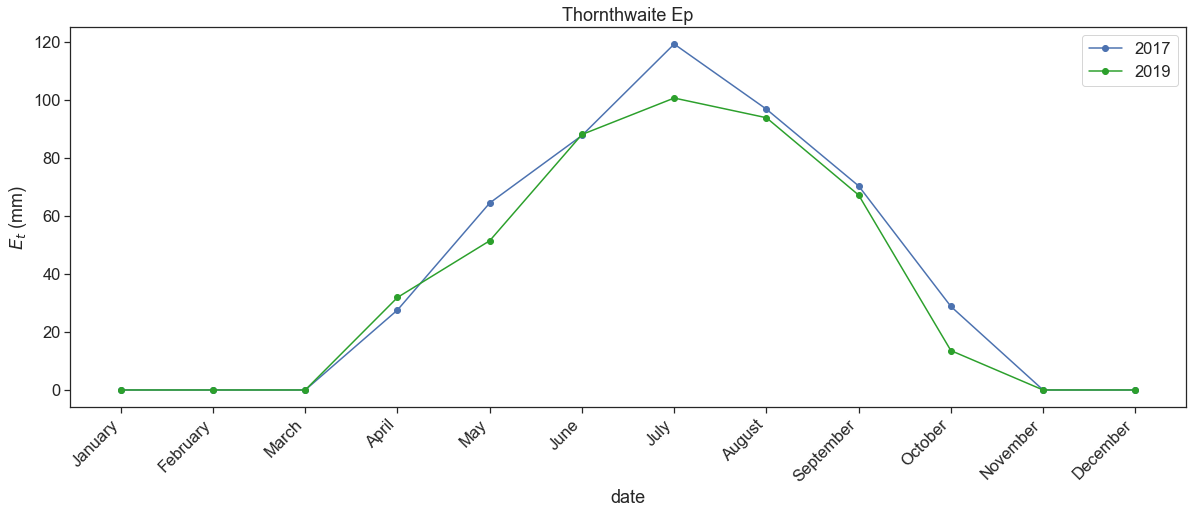

In [29]:
# creating same index and showing graphs for 2017 and 2019 on top of each other to have better look on the differences
# to see 2018 years result you can unmark the relevant lines 

fig, (ax1) = plt.subplots(1, 1, figsize=(20,7))

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_2017T['months'] = month
df_2018T['months'] = month
df_2019T['months'] = month
df_2017T = df_2017T.set_index('months')
df_2018T = df_2018T.set_index('months')
df_2019T = df_2019T.set_index('months')



ax1.plot(df_2017T['AIR_TEMPERATURE'], 'o-', label = "2017")
# ax2.plot(df_2018T['AIR_TEMPERATURE'], 'o-', label = "2018 ")
ax1.plot(df_2019T['AIR_TEMPERATURE'], 'o-', label = "2019 ", color="tab:green")

ax1.set(xlabel="date",
       ylabel="T (C)",
       title="Temperature");
ax1.legend()
for label in ax1.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')

plt.savefig('Temperature 2017 vs 2019')

fig, (ax2) = plt.subplots(1, 1, figsize=(20,7))

ax2.plot(df_2017T['Ep'], 'o-', label = "2017")
# ax1.plot(df_2018T['Ep'], 'o-', label = "2018")
ax2.plot(df_2019T['Ep'], 'o-', label = "2019", color="tab:green")

ax2.set(xlabel="date",
       ylabel=r"$E_t$ (mm)",
       title="Thornthwaite Ep");
ax2.legend()
for label in ax2.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')

plt.savefig('Thornthwaite 2017 vs 2019')

In [30]:
# creating an array and starting to add columns of data - temperature, wind (1.5 meters) and RH
# Resampling hourly data over same day and taking mean, to obtain daily averages

## 2017
df_2017P = (df_2017['AIR_TEMPERATURE'].resample('D')
                 .mean()
                 .to_frame()
                     )
df_2017P.rename(columns = {'AIR_TEMPERATURE':'T'}, inplace = True)
df_2017P['U'] = (df_2017['WIND_1_5'].resample('D')
                               .mean()
              )
df_2017P['RH'] = (df_2017['RELATIVE_HUMIDITY'].resample('D')
                                           .mean()
               )

## 2018
df_2018P = (df_2018['AIR_TEMPERATURE'].resample('D')
                 .mean()
                 .to_frame()
                     )
df_2018P.rename(columns = {'AIR_TEMPERATURE':'T'}, inplace = True)
df_2018P['U'] = (df_2018['WIND_1_5'].resample('D')
                               .mean()
              )
df_2018P['RH'] = (df_2018['RELATIVE_HUMIDITY'].resample('D')
                                           .mean()
               )
## 2019

df_2019P = (df_2019['AIR_TEMPERATURE'].resample('D')
                 .mean()
                 .to_frame()
                     )
df_2019P.rename(columns = {'AIR_TEMPERATURE':'T'}, inplace = True)
df_2019P['U'] = (df_2019['WIND_1_5'].resample('D')
                               .mean()
              )
df_2019P['RH'] = (df_2019['RELATIVE_HUMIDITY'].resample('D')
                                           .mean()
               )

In [31]:
#functions for lambda, Delta and G - all depend on T which we already have and air pressure 

def lambda_latent_heat(T):
    """daily latent heat of vaporization (MJ/kg)"""
    return 2.501 - 2.361e-3*T

def Delta(T):
    """slope of saturation-vapor curve (kPa/°C)"""
    return 0.2000*(0.00738*T + 0.8072)**7 - 0.000116

def G(T):
    """heat flux density to the ground, G (MJ/m2/d)"""
    return 4.2*np.gradient(T.values)

# finding pressure - 2017 height above sea level 1209
df_2017P['P'] = 101.3-0.01055*609

cp = 0.001013  # (MJ kg−1 °C−1) 
df_2017P['lambda'] = lambda_latent_heat(df_2017P['T'])
df_2017P['Delta'] = Delta(df_2017P['T'])
df_2017P['G'] = G(df_2017P['T'])
df_2017P['gamma'] = (cp*df_2017P['P'])/(0.622*df_2017P['lambda'])
df_2017P['f_wind'] = 1.0 + 0.53 * df_2017P['U']

## 2018

# finding pressure - Everglades height above sea level 0
df_2018P['P'] = 101.3-0.01055*609

cp = 0.001013  # (MJ kg−1 °C−1) 
df_2018P['lambda'] = lambda_latent_heat(df_2018P['T'])
df_2018P['Delta'] = Delta(df_2018P['T'])
df_2018P['G'] = G(df_2018P['T'])
df_2018P['gamma'] = (cp*df_2018P['P'])/(0.622*df_2018P['lambda'])
df_2018P['f_wind'] = 1.0 + 0.53 * df_2018P['U']

## 2019

# finding pressure - Everglades height above sea level 0
df_2019P['P'] = 101.3-0.01055*609

cp = 0.001013  # (MJ kg−1 °C−1) 
df_2019P['lambda'] = lambda_latent_heat(df_2019P['T'])
df_2019P['Delta'] = Delta(df_2019P['T'])
df_2019P['G'] = G(df_2019P['T'])
df_2019P['gamma'] = (cp*df_2019P['P'])/(0.622*df_2019P['lambda'])
df_2019P['f_wind'] = 1.0 + 0.53 * df_2019P['U']

In [32]:
# creating a function using data which will collect evetually calculate Rn

def R(a,b,df_pen):
    sigma = 4.903e-9
    emissivity = -0.02 + 0.261 * np.exp(-7.77e-4 * df_pen['T']**2)
    
    # Rbo: net longwave radiation for clear skies, otherwise known as diffuse radiation or emitted radiation from the
    Rbo = emissivity*sigma*((df_pen['T']+273.15)**4)

    # net outgoing long-wave radiation (note: Rs/Rso = proportion of how clear the day is)
    # for semi arid areas like wolf point, a=1.2 and b=-0.2
    Rb = (a*df_pen['Rs_MJ']/df_pen['Rso_monthly'] + b)*Rbo   

    # α is the albedo, or short-wave reflectance (dimensionless) 
    alpha = 0.23

    # net radiation
    Rn = (1 - alpha) * df_pen['Rs_MJ'] - Rb   # (MJ/m2/d)
    df_pen['Rn'] = Rn
    
# since the data we have is in W/m^2 we will create a function to convert it to MJ/(m^2*d)
def convert_units(Rs):  
    return Rs*3600*24/(10**6)


In [33]:
# Rso: mean solar radiation from a cloudless sky (based on latitude) -
# using the latitude for each location and a table of mean solar radiation 
# MJ/m2/d

##2017
Rso_monthly_2017 = np.array([6.70,11.43,18.55,25.83,
                           30.98,33.08,31.53,26.67,
                           20.10,13.52,8.08,5.44])

df_2017P["Rso_monthly"] = ""

# every day in the month will have the same values for Rso
for i in range(12):
    df_2017P.loc[df_2017P.index.month==(i+1), "Rso_monthly"] = Rso_monthly_2017[i]
df_2017P["Rs"]=df_2017["SOLAR_RADIATION"].resample('D').mean()

#using function to convert units
df_2017P['Rs_MJ']=df_2017P['Rs'].apply(convert_units)

#using function to calculate Rn
R(1.2,-0.2,df_2017P)

##2018


Rso_monthly_2018 = np.array([6.70,11.43,18.55,25.83,
                           30.98,33.08,31.53,26.67,
                           20.10,13.52,8.08,5.44])
df_2018P["Rso_monthly"] = ""
# every day in the month will have the same values for Rso
for i in range(12):
    df_2018P.loc[df_2018P.index.month==(i+1), "Rso_monthly"] = Rso_monthly_2018[i]
df_2018P["Rs"]=df_2018["SOLAR_RADIATION"].resample('D').mean()

#using function to convert units
df_2018P['Rs_MJ']=df_2018P['Rs'].apply(convert_units)

#using function to calculate Rn
R(1.2,-0.2,df_2018P)

##2019


Rso_monthly_2019 = np.array([6.70,11.43,18.55,25.83,
                           30.98,33.08,31.53,26.67,
                           20.10,13.52,8.08,5.44])
df_2019P["Rso_monthly"] = ""
# every day in the month will have the same values for Rso
for i in range(12):
    df_2019P.loc[df_2019P.index.month==(i+1), "Rso_monthly"] = Rso_monthly_2019[i]
df_2019P["Rs"]=df_2019["SOLAR_RADIATION"].resample('D').mean()

#using function to convert units
df_2019P['Rs_MJ']=df_2019P['Rs'].apply(convert_units)

#using function to calculate Rn
R(1.2,-0.2,df_2019P)

In [34]:
# vapor pressure deficit = VPD
# creating a function to calculate es

def vp_sat(T):
    return np.exp((16.78*T - 116.9)/(T + 237.3)) 

## 2017
df_2017P['es'] = vp_sat(df_2017P['T'])
df_2017P['ed'] = df_2017P['es'] * df_2017P['RH'] / 100
df_2017P['VPD'] = df_2017P['es'] - df_2017P['ed']

## 2018

df_2018P['es'] = vp_sat(df_2018P['T'])
df_2018P['ed'] = df_2018P['es'] * df_2018P['RH'] / 100
df_2018P['VPD'] = df_2018P['es'] - df_2018P['ed']

## 2019

df_2019P['es'] = vp_sat(df_2019P['T'])
df_2019P['ed'] = df_2019P['es'] * df_2019P['RH'] / 100
df_2019P['VPD'] = df_2019P['es'] - df_2019P['ed']

In [35]:
# creating a function that collect all the data we found and 
# using it in penman equation to find EP
def E_penman(df):
    T = df['T']
    Delta = df['Delta']
    gamma = df['gamma']
    Rn = df['Rn']
    G = df['G']
    EA = 6.43*df['f_wind'] * df['VPD']
    lambd = df['lambda']
    return ((Delta / (Delta + gamma))*(Rn - G) + ((gamma / (Delta + gamma))*EA)) / lambd

##2017
df_2017P['E_penman'] = E_penman(df_2017P)
# since evaporation cant be negative we will convert all negative numbers to 0
df_penclean0_2017 = df_2017P['E_penman']
df_penclean0_2017[df_penclean0_2017 < 0] = 0
df_2017P['E_pen'] = df_penclean0_2017

##2018
df_2018P['E_penman'] = E_penman(df_2018P)
# since evaporation cant be negative we will convert all negative numbers to 0
df_penclean0_2018 = df_2018P['E_penman']
df_penclean0_2018[df_penclean0_2018 < 0] = 0
df_2018P['E_pen'] = df_penclean0_2018

##2019
df_2019P['E_penman'] = E_penman(df_2019P)
# since evaporation cant be negative we will convert all negative numbers to 0
df_penclean0_2019 = df_2019P['E_penman']
df_penclean0_2019[df_penclean0_2019 < 0] = 0
df_2019P['E_pen'] = df_penclean0_2019

<ipython-input-35-3d338918160b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penclean0_2017[df_penclean0_2017 < 0] = 0
<ipython-input-35-3d338918160b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penclean0_2018[df_penclean0_2018 < 0] = 0
<ipython-input-35-3d338918160b>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_penclean0_2019[df_penclean0_2019 < 0] = 0


(0.0, 14.0)

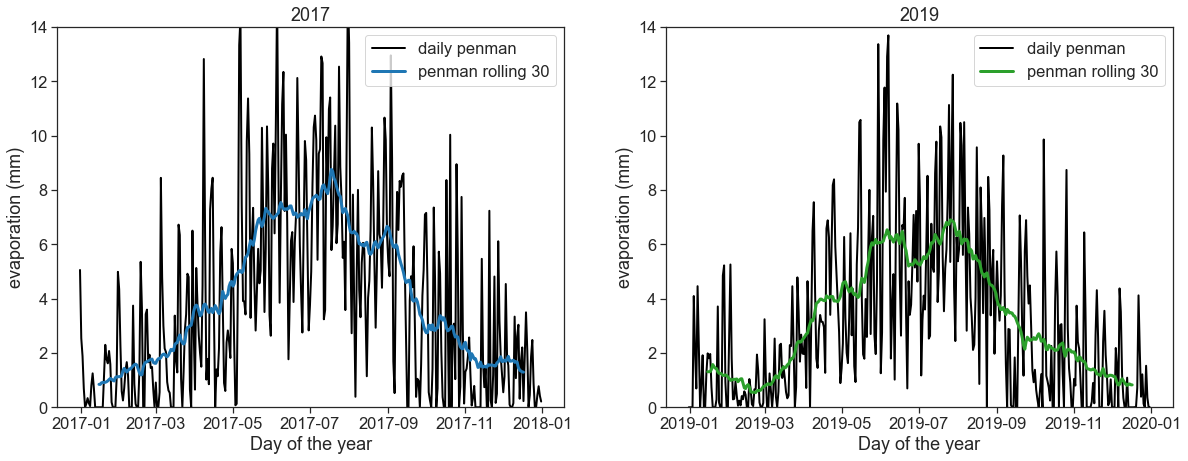

In [36]:
# creating rolling average - 30 days -  for all three years while also showing the actual daily results
# to see graph for 2018 unmark relevant lines

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,7))

## 2017
ax1.plot(df_2017P['E_pen'], color="black", label="daily penman", linewidth=2)
rolling_mean_2017 = df_2017P['E_pen'].rolling(30, center=True).mean()
ax1.plot(rolling_mean_2017, color="tab:blue",label="penman rolling 30", linewidth=3,)
ax1.set(xlabel="Day of the year", ylabel="evaporation (mm)", title="2017")
ax1.legend();
ax1.set_ylim(0,14)                        # limits of y axis


## 2019
ax2.plot(df_2019P['E_pen'], color="black", label="daily penman", linewidth=2)
rolling_mean_2019 = df_2019P['E_pen'].rolling(30, center=True).mean()
ax2.plot(rolling_mean_2019, color="tab:green",label="penman rolling 30", linewidth=3,)
ax2.set(xlabel="Day of the year",ylabel="evaporation (mm)",title="2019")
ax2.legend()
ax2.set_ylim(0,14)                        # limits of y axis

# ## 2018

# fig, (ax3) = plt.subplots(1, 1, figsize=(7.5,6))

# ax3.plot(df_2018P['E_pen'], color="black", label="daily penman", linewidth=2)
# rolling_mean_2018 = df_2018P['E_pen'].rolling(30, center=True).mean()
# ax3.plot(rolling_mean_2018, color="tab:orange",label="penman rolling 30", linewidth=3,)
# ax3.set(xlabel="Day of the year",ylabel="evaporation (mm)",title="2018")
# ax3.legend()
# ax3.set_ylim(0,14)                        # limits of y axis


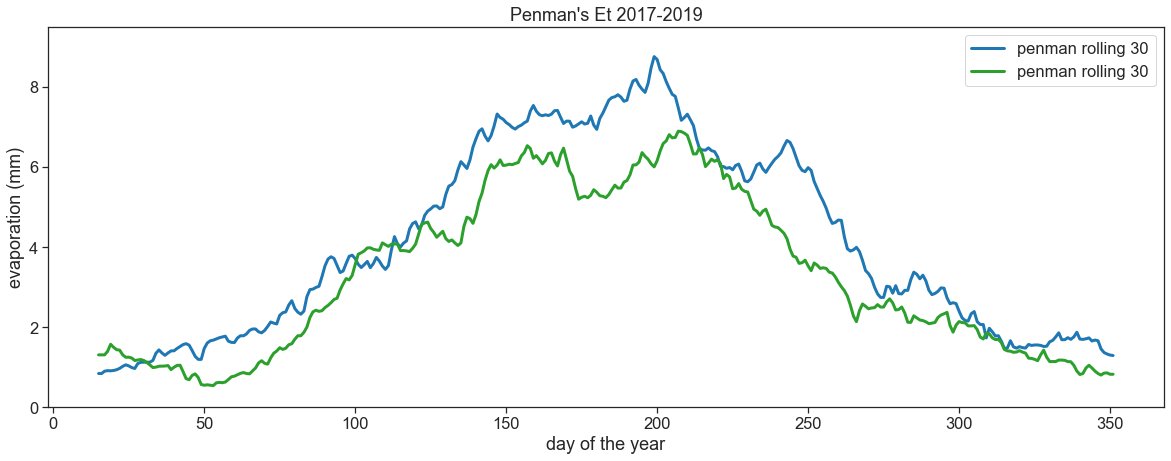

In [37]:
# A comparison between 2017 and 2019 for penman's Et
# to see graph for 2018 unmark relevant lines


# saving data for budayko later
df_2017PBUD = df_2017P['E_pen']
df_2018PBUD = df_2018P['E_pen']
df_2019PBUD = df_2019P['E_pen']

df_2017P = df_2017P.reset_index()
df_2018P = df_2018P.reset_index()
df_2019P = df_2019P.reset_index()
fig, (ax1) = plt.subplots(1, 1, figsize=(20,7))

## 2017
rolling_mean_2017 = df_2017P['E_pen'].rolling(30, center=True).mean()
ax1.plot(rolling_mean_2017, color="tab:blue",label="penman rolling 30", linewidth=3,)
ax1.set(xlabel="day of the year", ylabel="evaporation (mm)", title="Penman's Et 2017-2019")
ax1.legend();
ax1.set_ylim(0,9)                        # limits of y axis

# ## 2018
# rolling_mean_2018 = df_2018P['E_pen'].rolling(30, center=True).mean()
# ax1.plot(rolling_mean_2018, color="tab:red",label="penman rolling 30", linewidth=3,)
# ax1.set(xlabel="day of the year", ylabel="evaporation (mm)", title="2017")
# ax1.legend();
# ax1.set_ylim(0,9)                        # limits of y axis


## 2019
rolling_mean_2019 = df_2019P['E_pen'].rolling(30, center=True).mean()
ax1.plot(rolling_mean_2019, color="tab:green",label="penman rolling 30", linewidth=3,)
ax1.set(xlabel="day of the year",ylabel="evaporation (mm)",title="Penman's Et 2017-2019")
ax1.legend()
ax1.set_ylim(0,9.5)                        # limits of y axis

plt.savefig('penman 2017 vs 2019')

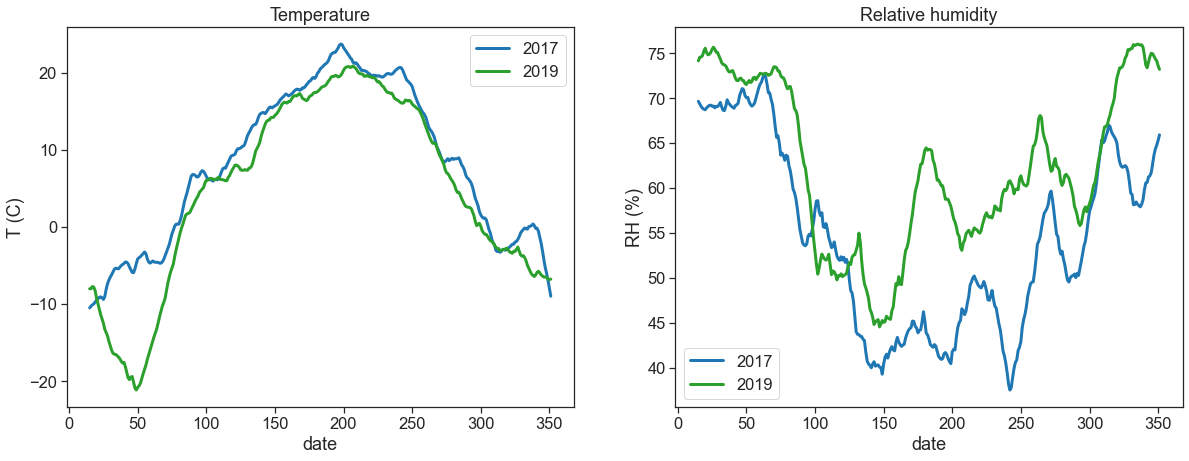

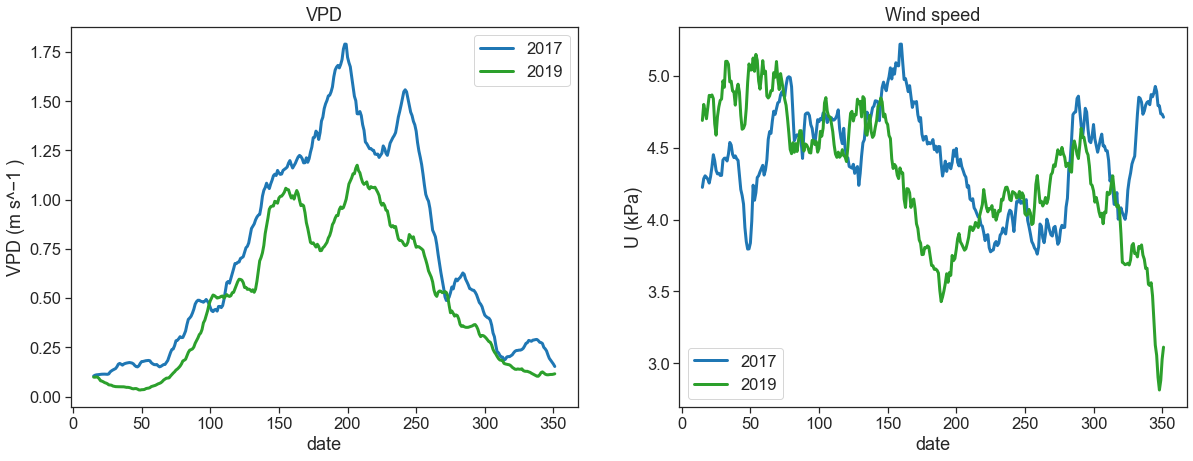

In [38]:
# A comparison between 2017 to 2019 for T, RH, VPD and wind speed
# to see graphs for 2018 unmark relevant lines in the next box

fig1, (ax2,ax1) = plt.subplots(1, 2, figsize=(20,7))

# comparison of RH
ax1.set(xlabel="date", ylabel="RH (%)", title = 'Relative humidity')
rolling_mean_2017 = df_2017P['RH'].rolling(30, center=True).mean()
ax1.plot(rolling_mean_2017, linewidth=3, color="tab:blue",label="2017")
rolling_mean_2019 = df_2019P['RH'].rolling(30, center=True).mean()
ax1.plot(rolling_mean_2019, linewidth=3, color="tab:green", label="2019")
ax1.legend()

# comparison of T
ax2.set(xlabel="date", ylabel="T (C)", title = 'Temperature')
rolling_mean_2017 = df_2017P['T'].rolling(30, center=True).mean()
ax2.plot(rolling_mean_2017, linewidth=3, color="tab:blue",label="2017")
rolling_mean_2019 = df_2019P['T'].rolling(30, center=True).mean()
ax2.plot(rolling_mean_2019, linewidth=3, color="tab:green", label="2019")
ax2.legend()

plt.savefig('RH and T')

fig2, (ax3,ax4) = plt.subplots(1, 2, figsize=(20,7))

# comparison of VPD
ax3.set(xlabel="date", ylabel="VPD (m s^−1 )", title = 'VPD')
rolling_mean_2017 = df_2017P['VPD'].rolling(30, center=True).mean()
ax3.plot(rolling_mean_2017, linewidth=3, color="tab:blue",label="2017")
rolling_mean_2019 = df_2019P['VPD'].rolling(30, center=True).mean()
ax3.plot(rolling_mean_2019, linewidth=3, color="tab:green", label="2019")
ax3.legend()

# comparison of U
ax4.set(xlabel="date", ylabel="U (kPa)", title = 'Wind speed')
rolling_mean_2017 = df_2017P['U'].rolling(30, center=True).mean()
ax4.plot(rolling_mean_2017, linewidth=3, color="tab:blue",label="2017")
rolling_mean_2019 = df_2019P['U'].rolling(30, center=True).mean()
ax4.plot(rolling_mean_2019, linewidth=3, color="tab:green", label="2019")
ax4.legend()

plt.savefig('VPD and wind speed')


In [39]:
# # 2018 data for all four parameters

# fig1, (ax2,ax1) = plt.subplots(1, 2, figsize=(20,7))

# # comparison of RH
# ax1.set(xlabel="date", ylabel="RH (%)", title = 'Relative humidity')
# rolling_mean_2018 = df_2018P['RH'].rolling(30, center=True).mean()
# ax1.plot(rolling_mean_2018, linewidth=3, color="tab:red",label="2018")

# ax1.legend()

# # comparison of T
# ax2.set(xlabel="date", ylabel="T (C)", title = 'Temperature')
# rolling_mean_2018 = df_2018P['T'].rolling(30, center=True).mean()
# ax2.plot(rolling_mean_2018, linewidth=3, color="tab:red",label="2018")

# ax2.legend()


# fig2, (ax3,ax4) = plt.subplots(1, 2, figsize=(20,7))

# # comparison of VPD
# ax3.set(xlabel="date", ylabel="VPD (m s^−1 )", title = 'VPD')
# rolling_mean_2018 = df_2018P['VPD'].rolling(30, center=True).mean()
# ax3.plot(rolling_mean_2018, linewidth=3, color="tab:red",label="2018")
# ax3.legend()

# # comparison of U
# ax4.set(xlabel="date", ylabel="U (kPa)", title = 'Wind speed')
# rolling_mean_2018 = df_2018P['U'].rolling(30, center=True).mean()
# ax4.plot(rolling_mean_2018, linewidth=3, color="tab:red",label="2018")
# ax4.legend()

# Part 3 - discharge

In [40]:
# downloading precipitation and discharge data for 2017
data_file = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2017/CRNS0101-05-2017-MT_Wolf_Point_34_NE.txt"
df_p_2017= pd.read_csv(data_file,
                 header=None,                      # no headers needed, we'll do that later
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/headers.txt",    # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_p_2017.columns = headers.columns                       
# LST = local standard time
df_p_2017["LST_TIME"] = [f"{x:04d}" for x in df_p_2017["LST_TIME"]]  # time needs padding of zeros, then convert to string
df_p_2017['LST_DATE'] = df_p_2017['LST_DATE'].astype(str)            # convert date into string
df_p_2017['datetime'] = df_p_2017['LST_DATE'] + ' ' + df_p_2017['LST_TIME'] # combine date+time into datetime
df_p_2017['datetime'] = pd.to_datetime(df_p_2017['datetime'])        # interpret datetime
df_p_2017 = df_p_2017.set_index('datetime')                          # make datetime the index

#discharge data
data_file = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=06177000&period=&begin_date=2017-01-01&end_date=2018-01-01"
df_q_2017 = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_2017.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_2017['date_and_time'] = df_q_2017['datetime'] + ' ' + df_q_2017['tz_cd'] # combine date+time into datetime
df_q_2017['date_and_time'] = pd.to_datetime(df_q_2017['date_and_time'])        # interpret datetime
df_q_2017 = df_q_2017.set_index('date_and_time')                          # make datetime the index
df_q_2017['discharge'] = df_q_2017['discharge'].astype(float)
df_q_2017['discharge'] = df_q_2017['discharge'] * 0.0283168 # convert cubic feet to m3

In [41]:
## downloading precipitation and discharge data for 2018
data_file = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2018/CRNS0101-05-2018-MT_Wolf_Point_34_NE.txt"
df_p_2018= pd.read_csv(data_file,
                 header=None,                      # no headers needed, we'll do that later
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/headers.txt",    # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_p_2018.columns = headers.columns                       
# LST = local standard time
df_p_2018["LST_TIME"] = [f"{x:04d}" for x in df_p_2018["LST_TIME"]]  # time needs padding of zeros, then convert to string
df_p_2018['LST_DATE'] = df_p_2018['LST_DATE'].astype(str)            # convert date into string
df_p_2018['datetime'] = df_p_2018['LST_DATE'] + ' ' + df_p_2018['LST_TIME'] # combine date+time into datetime
df_p_2018['datetime'] = pd.to_datetime(df_p_2018['datetime'])        # interpret datetime
df_p_2018 = df_p_2018.set_index('datetime')                          # make datetime the index

#discharge data
data_file = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=06177000&period=&begin_date=2018-01-01&end_date=2019-01-01"
df_q_2018 = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_2018.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_2018['date_and_time'] = df_q_2018['datetime'] + ' ' + df_q_2018['tz_cd'] # combine date+time into datetime
df_q_2018['date_and_time'] = pd.to_datetime(df_q_2018['date_and_time'])        # interpret datetime
df_q_2018 = df_q_2018.set_index('date_and_time')                          # make datetime the index
df_q_2018['discharge'] = df_q_2018['discharge'].astype(float)
df_q_2018['discharge'] = df_q_2018['discharge'] * 0.0283168 # convert cubic feet to m3

In [42]:
## downloading precipitation and discharge data for 2019
data_file = "https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/2019/CRNS0101-05-2019-MT_Wolf_Point_34_NE.txt"
df_p_2019= pd.read_csv(data_file,
                 header=None,                      # no headers needed, we'll do that later
                 delim_whitespace=True,            # blank spaces separate between columns
                 na_values=["-99.000", "-9999.0"]  # substitute these values for missing (NaN) values
                )
headers = pd.read_csv("https://www.ncei.noaa.gov/pub/data/uscrn/products/subhourly01/headers.txt",    # load headers file
                      header=1,                    # skip the first [0] line
                      delim_whitespace=True
                     )
df_p_2019.columns = headers.columns                       
# LST = local standard time
df_p_2019["LST_TIME"] = [f"{x:04d}" for x in df_p_2019["LST_TIME"]]  # time needs padding of zeros, then convert to string
df_p_2019['LST_DATE'] = df_p_2019['LST_DATE'].astype(str)            # convert date into string
df_p_2019['datetime'] = df_p_2019['LST_DATE'] + ' ' + df_p_2019['LST_TIME'] # combine date+time into datetime
df_p_2019['datetime'] = pd.to_datetime(df_p_2019['datetime'])        # interpret datetime
df_p_2019 = df_p_2019.set_index('datetime')                          # make datetime the index

#discharge data
data_file = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=06177000&period=&begin_date=2019-01-01&end_date=2020-01-01"
df_q_2019 = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_2019.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_2019['date_and_time'] = df_q_2019['datetime'] + ' ' + df_q_2019['tz_cd'] # combine date+time into datetime
df_q_2019['date_and_time'] = pd.to_datetime(df_q_2019['date_and_time'])        # interpret datetime
df_q_2019 = df_q_2019.set_index('date_and_time')                          # make datetime the index
df_q_2019['discharge'] = df_q_2019['discharge'].astype(float)
df_q_2019['discharge'] = df_q_2019['discharge'] * 0.0283168 # convert cubic feet to m3

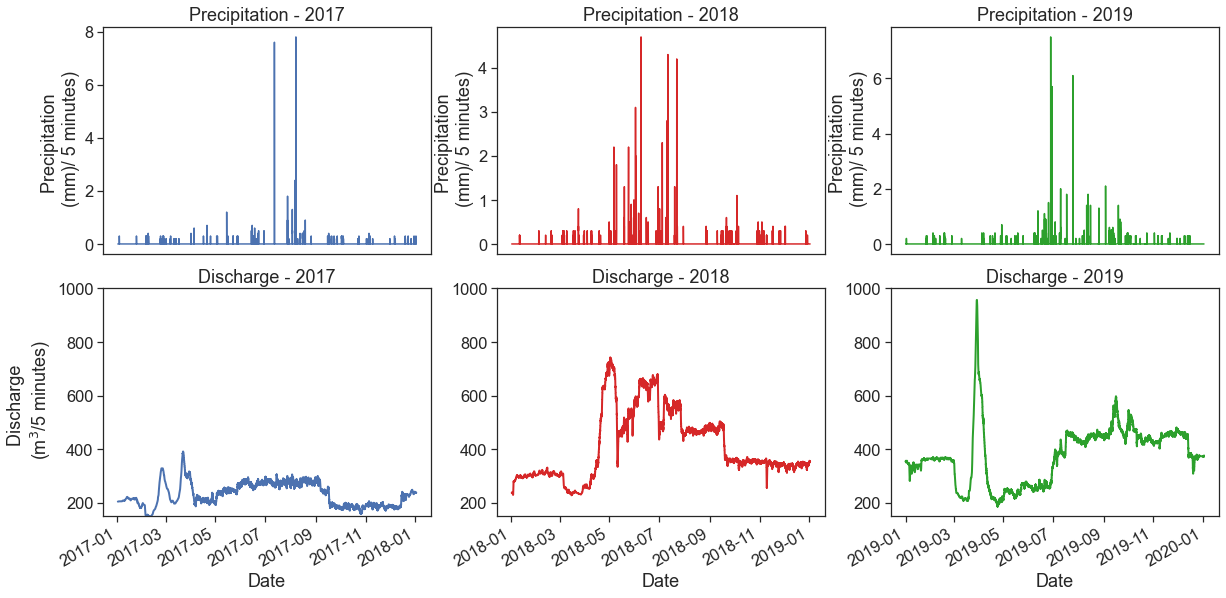

In [43]:
# graphs for precipitation VS discharge for 2017 - 2019

fig, ((ax1, ax2 , ax3) ,(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.15)

ax1.plot(df_p_2017['PRECIPITATION'])
ax1.set(xticks=[],
        ylabel="Precipitation \n (mm)/ 5 minutes)",
        title="Precipitation - 2017")

ax2.plot(df_p_2018['PRECIPITATION'] ,color="tab:red")
ax2.set(xticks=[],
        ylabel="Precipitation \n (mm)/ 5 minutes)",
        title="Precipitation - 2018")

ax3.plot(df_p_2019['PRECIPITATION'] , color="tab:green")
ax3.set(xticks=[],
        ylabel="Precipitation \n (mm)/ 5 minutes)",
        title="Precipitation - 2019")

ax4.plot(df_q_2017['discharge'], lw=2)
ax4.set(xlabel="Date"
       , ylabel="Discharge \n (m$^3$/5 minutes)"
       , title="Discharge - 2017")
ax4.set_ylim([150,1000])

ax5.plot(df_q_2018['discharge'], color="tab:red", lw=2)
ax5.set(xlabel="Date"
#         ,ylabel="Discharge \n (m$^3$/5 minutes)"
       , title="Discharge - 2018")
ax5.set_ylim([150,1000])

ax6.plot(df_q_2019['discharge'], color="tab:green", lw=2)
ax6.set(xlabel="Date"
#         ,ylabel="Discharge \n (m$^3$/5 minutes)"
       , title="Discharge - 2019")
ax6.set_ylim([150,1000])

plt.gcf().autofmt_xdate()  # makes slated dates

plt.savefig('discharge 2017 - 2019')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Discharge \n (m$^3$/5 minutes)'),
 Text(0.5, 1.0, 'Discharge - 1990 - 2021')]

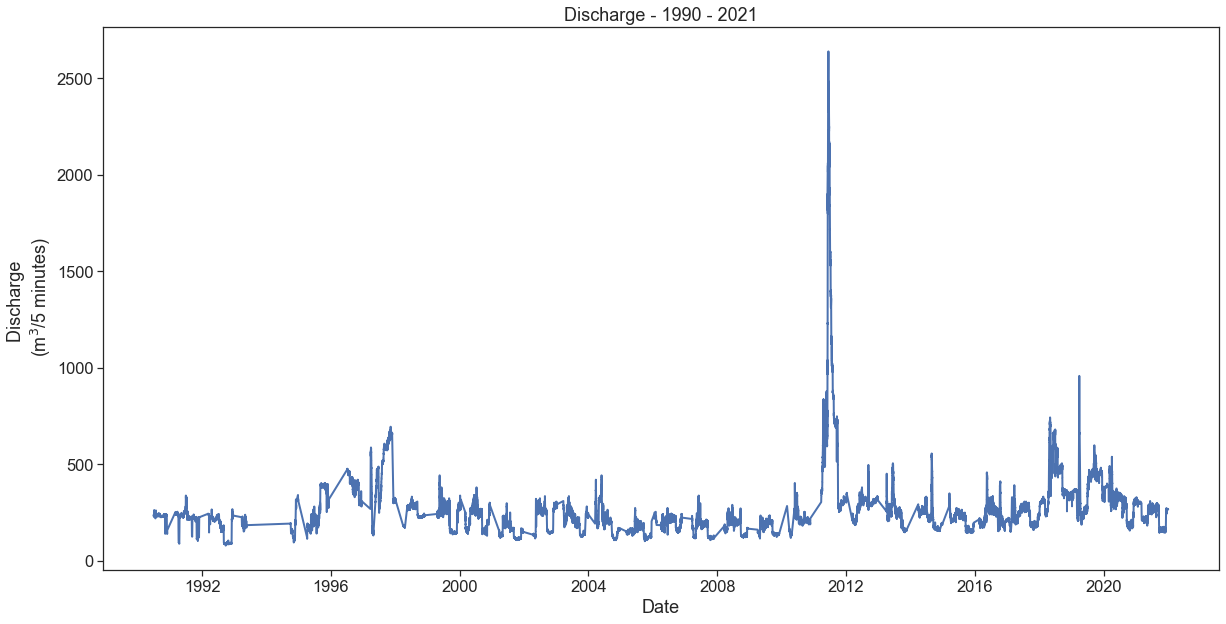

In [44]:
#downloading discharge daily data for all years avaiable 1990 - 2021 and plotting it
data_file = "https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&site_no=06177000&period=&begin_date=1990-07-01&end_date=2021-12-31"
df_q_all = pd.read_csv(data_file,
                        header=31,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q_all.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q_all['date_and_time'] = df_q_all['datetime'] + ' ' + df_q_all['tz_cd'] # combine date+time into datetime
df_q_all['date_and_time'] = pd.to_datetime(df_q_all['date_and_time'])        # interpret datetime
df_q_all = df_q_all.set_index('date_and_time')                          # make datetime the index
df_q_all['discharge'] = df_q_all['discharge'].astype(float)
df_q_all['discharge'] = df_q_all['discharge'] * 0.0283168 # convert cubic feet to m3

fig, (ax1) = plt.subplots(1,1 , figsize=(20,10))

ax1.plot(df_q_all['discharge'], lw=2)
ax1.set(xlabel="Date"
       , ylabel="Discharge \n (m$^3$/5 minutes)"
       , title="Discharge - 1990 - 2021")

In [45]:
re_by_day = (df_q_all['discharge'].resample('D')
                        .sum()
                        .to_frame())
max_year_by_day = (re_by_day['discharge'].resample('A')
                        .max()
                        .to_frame())

Text(0.5, 1.0, 'Wolf point daily discharge 1990 - 2021')

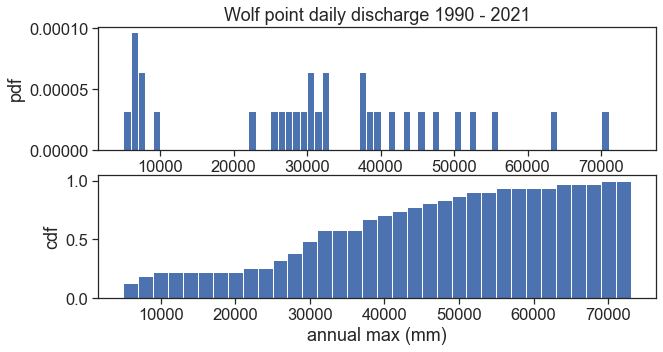

In [46]:
#creating figures of pdf and cdf 
fig, ((ax1), (ax3)) = plt.subplots(2, 1, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)


S=max_year_by_day['discharge'].values
ax1.hist(S, bins=np.arange(5000,75000,1000), density=True)
ax3.hist(S, bins=np.arange(5000,75000,2000), cumulative=1, density=True)
ax1.set(ylabel="pdf")
ax3.set(xlabel="annual max (mm)",
        ylabel="cdf",);

ax1.set_title("Wolf point daily discharge 1990 - 2021")

In [47]:
# sort yearly max from lowest to highest
max_year_by_day_lowtohigh = max_year_by_day.sort_values(by=['discharge'], ascending=True)
max_year_by_day_lowtohigh['rank'] = np.arange(0, len(max_year_by_day_lowtohigh + 1))

nS = len(max_year_by_day_lowtohigh['rank'])
mS = max_year_by_day_lowtohigh['rank']
PmS = mS / (nS+1)
TrS = 1 / (1 - PmS)


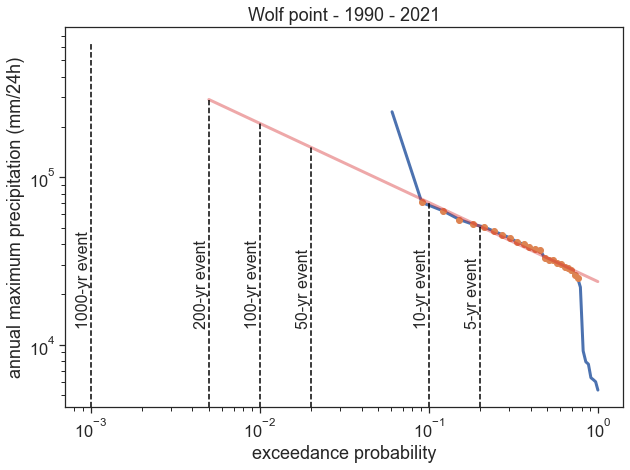

In [48]:
# making a return period graph
fig, (ax1) = plt.subplots(1,1,figsize=(10,7))
plt.subplots_adjust(wspace=0.3)

def equation(p):
    return np.exp(slope*np.log(p) + intercept)

depthS = max_year_by_day_lowtohigh['discharge'].values
exc_probS = (1-PmS).values

ax1.plot(exc_probS, depthS, lw=3, label="Weibull plotting position")
ax1.set(ylabel="annual maximum precipitation (mm/24h)",
       xlabel="exceedance probability")
ax1.set_xscale("log")
ax1.set_yscale("log")

excludeS = 8
depth_tofitS = depthS[excludeS:-1]
exc_prob_tofitS = exc_probS[excludeS:-1]
ax1.plot(exc_prob_tofitS, depth_tofitS, 'o')

exc_prob_tofit_logS = np.log(exc_prob_tofitS)
depth_tofit_logS = np.log(depth_tofitS)
slope, intercept = np.polyfit(exc_prob_tofit_logS, depth_tofit_logS, 1)

probS = [0.005,1-1e-3]
ax1.plot(probS, equation(probS), lw=3, color="tab:red", alpha=0.4)
ax1.set_title("Wolf point - 1990 - 2021")

one_in_x_years = np.array([5, 10, 50, 100, 200, 1000])

for y in one_in_x_years:
    ax1.plot([1/y]*2, [0, equation(1/y)], color="black", ls="--")
    ax1.text(1/y, 13000, f"{y}-yr event", rotation=90, ha="right", fontsize=16)


# Part 4 - budyko

In [49]:
# rearraging data for exact same days of the year for discharge and precipitation
df_q_2017g = df_q_2017['discharge']['2017-01-02 00:00:00':'2017-12-30 00:00:00']
df_q_2018g = df_q_2018['discharge']['2018-01-02 00:00:00':'2018-12-30 00:00:00']
df_q_2019g = df_q_2019['discharge']['2019-01-02 00:00:00':'2019-12-30 00:00:00']

df_p_2017g = df_p_2017['PRECIPITATION']['2017-01-02 00:00:00':'2017-12-30 00:00:00']
df_p_2018g = df_p_2018['PRECIPITATION']['2018-01-02 00:00:00':'2018-12-30 00:00:00']
df_p_2019g = df_p_2019['PRECIPITATION']['2019-01-02 00:00:00':'2019-12-30 00:00:00']


In [50]:
# df with all the necessary data for budyko's curve of the p/ q in the years 2017, 2018, 2019

yearsq =df_q_2017g.to_frame()
yearsq = yearsq.append(df_q_2018g.to_frame())
yearsq = yearsq.append(df_q_2019g.to_frame())


yearsp = df_p_2017g.to_frame()
yearsp = yearsp.append(df_p_2018g.to_frame())
yearsp= yearsp.append(df_p_2019g.to_frame())
yearsq*=240
yearsq = yearsq['discharge'].resample('D').sum().to_frame()
yearsp = yearsp['PRECIPITATION'][:-1].resample('D').sum().to_frame()


In [51]:
# ## create budyko data frame from the years we calculated Penman PET for

df_2017Pg = df_2017PBUD.resample('D').sum().to_frame()
df_2018Pg = df_2018PBUD.resample('D').sum().to_frame()
df_2019Pg = df_2019PBUD.resample('D').sum().to_frame()

penman =df_2017Pg['E_pen'][2:].to_frame()
penman = penman.append(df_2018Pg['E_pen'].to_frame())
penman = penman.append(df_2019Pg['E_pen'][:-2].to_frame())


budyko  = pd.concat((yearsq,yearsp,penman),
                    axis=1)                    # join columns next to each other according to index (same day)
budyko.columns = ['Q','P','PET']               # rename according to budyko equations
budyko = budyko.resample('Y').mean().dropna()  # calculate year mean and drop years without penman
# # P, PET are in the desired units of [L T^-1] mm/day. let us convert the Q to the same units
# # Drainage area: 80500 square miles
area = 80500 * 2.59e+6 # convert squared miles to squared meters
budyko['Q']  = budyko['Q'] *1000 / area  # m^3/day to mm/day
budyko['ET'] = budyko['P']-budyko['Q']                    # P = ET + Q according to budyko's framework
budyko['ET'][budyko['ET']<0] = 0 # all the nagetive values into 0
budyko


,Q,P,PET,ET
2017-12-31,0.019990,0.480822,3.860771,0.460832
2018-12-31,0.037993,0.812568,3.317094,0.774575
2019-12-31,0.032033,1.308540,3.133628,1.276507


<ipython-input-52-eb4c061f8cc7>:6: RuntimeWarning: divide by zero encountered in true_divide
  budyko_curve_y = np.power((budyko_curve_x*np.tanh(1/budyko_curve_x)*(1-np.exp(-budyko_curve_x))),0.5)


(8.02952407072481, 0.9584253229976738)
(4.082233630203987, 0.9532435126258673)
(2.394751153606504, 0.9755203009190188)


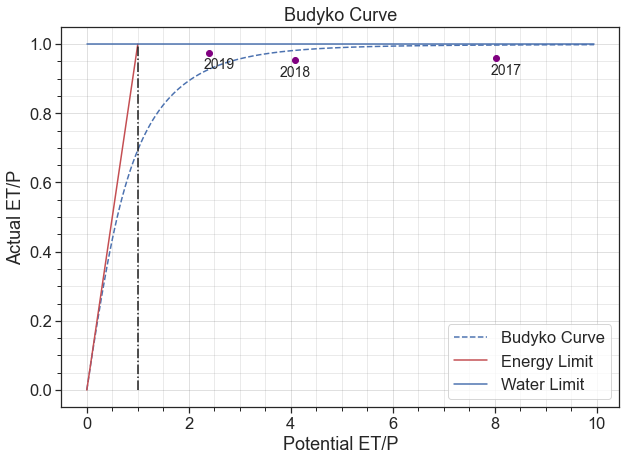

In [52]:
#create a budyko frame work graph with our results
budyko_curve_x = np.arange(0, 10, 0.05)
energy_limit_x = np.arange(0, 1.0001, 0.05)
x = np.arange(0, 1.0001, 0.05)

budyko_curve_y = np.power((budyko_curve_x*np.tanh(1/budyko_curve_x)*(1-np.exp(-budyko_curve_x))),0.5)

water_limit_y = 1+budyko_curve_x*0
energy_limit_y = energy_limit_x
y = 1 + x*0

years = ['2017-12-31' ,'2018-12-31','2019-12-31']
# plot budyko's results for 3 selected years
fig, ax = plt.subplots(figsize=(10,7)) 
offsets = (10,0,10,0,10,0,-10,0)
for year,offset in zip(years,offsets):
    d = budyko.loc[year]
    point = (d['PET']/d['P'],d['ET']/d['P'])
    print(point)
    ax.scatter(*point, color='purple')
    ax.annotate(year[:4], xy=point, xycoords='data',
                xytext=(offset,-12), textcoords='offset points',
                fontsize=14, ha="center", va='center')
    
ax.plot(budyko_curve_x,budyko_curve_y,  linestyle='--')
ax.plot(energy_limit_y,energy_limit_x, c='r')
ax.plot(budyko_curve_x,water_limit_y,c='b')
ax.plot(y,x,linestyle='-.', c='k',label='_nolegend_')

ax.set(ylabel="Actual ET/P")
ax.set(xlabel="Potential ET/P")
ax.set(title='Budyko Curve')
ax.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.2)
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.legend(["Budyko Curve","Energy Limit", "Water Limit"])
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.savefig("budyko.png");